In [1]:
from sys import argv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson

In [2]:
data = np.transpose(np.loadtxt('data/simple/calibracion_1ms.dat', delimiter=' '))
data2 = np.transpose(np.loadtxt('data/simple/calibracion_2ms.dat', delimiter=' '))
data3 = np.transpose(np.loadtxt('data/simple/calibracion_5ms.dat', delimiter=' '))

In [24]:
def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return  poisson.pmf(k, lamb)

def poisson_(k, lamb,a,offy,offx,b):
    """poisson pdf, parameter lamb is the fit parameter"""
    return a*( (np.exp(-lamb) * lamb**(b*k+offx)) /factorial(b*k+offx) )+offy 

No handles with labels found to put in legend.


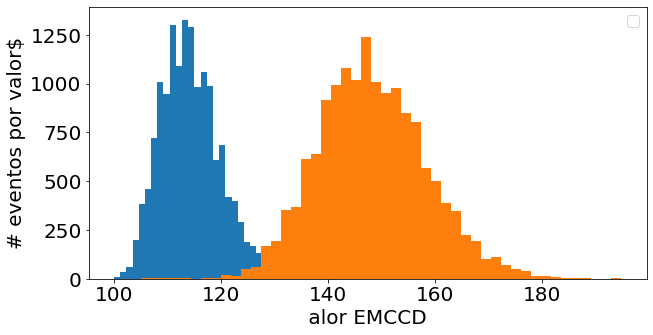

No handles with labels found to put in legend.


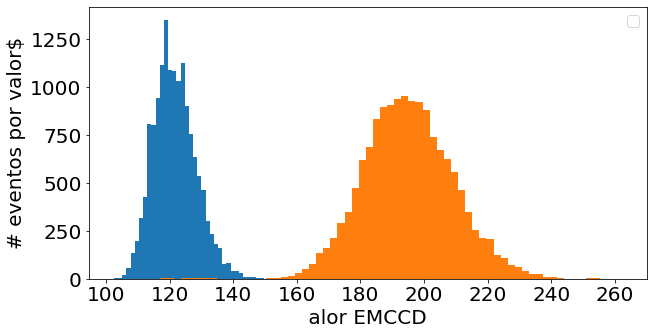

No handles with labels found to put in legend.


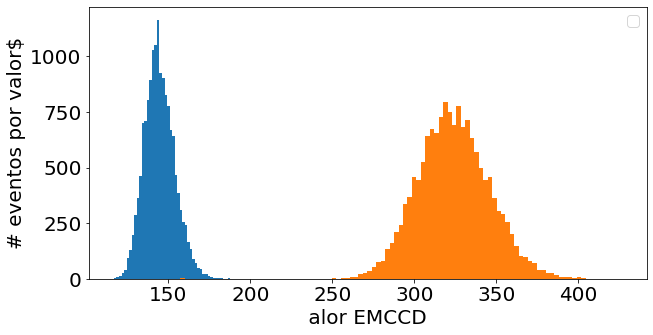

In [4]:
%matplotlib inline
plt.figure(figsize=(10,5))
entries1a, bin_edges1a, patches1a = plt.hist(data[0],bins=int(max(data[0])/4))
entries1b, bin_edges1b, patches1b = plt.hist(data[1],bins=int(max(data[1])/4))
plt.ylabel(r'# eventos por valor$',fontsize=20)
plt.xlabel(r' alor EMCCD ',fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
#plt.xlim([0,10])
#plt.ylim([0,0.32])
plt.legend(fontsize=15)
plt.show()

%matplotlib inline
plt.figure(figsize=(10,5))
entries2a, bin_edges2a, patches2a = plt.hist(data2[0],bins=int(max(data2[0])/4))
entries2b, bin_edges2b, patches2b = plt.hist(data2[1],bins=int(max(data2[1])/4))
plt.ylabel(r'# eventos por valor$',fontsize=20)
plt.xlabel(r' alor EMCCD ',fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
#plt.xlim([0,10])
#plt.ylim([0,0.32])
plt.legend(fontsize=15)
plt.show()

%matplotlib inline
plt.figure(figsize=(10,5))
entries5a, bin_edges5a, patches5a = plt.hist(data3[0],bins=int(max(data3[0])/4))
entries5b, bin_edges5b, patches5b = plt.hist(data3[1],bins=int(max(data3[1])/4))
plt.ylabel(r'# eventos por valor$',fontsize=20)
plt.xlabel(r' alor EMCCD ',fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
#plt.xlim([0,10])
#plt.ylim([0,0.32])
plt.legend(fontsize=15)
plt.show()

Covariance of coefficients:
[[ 1.60854054e+02  3.48800302e+04 -2.49768516e-02 -4.44028479e+01
   1.04969967e+00]
 [ 3.48800302e+04  7.57225291e+06 -9.52556387e+01 -9.64870699e+03
   2.27724065e+02]
 [-2.49768516e-02 -9.52556387e+01  9.03394716e+00 -1.03469750e+00
   5.19761049e-03]
 [-4.44028479e+01 -9.64870699e+03 -1.03469750e+00  1.27372732e+01
  -2.92225408e-01]
 [ 1.04969967e+00  2.27724065e+02  5.19761049e-03 -2.92225408e-01
   6.86278860e-03]]
lambda: 31.33332038013741
a: 13533.922381878065
offy: 1.614822939566426
offx: -48.56384418529389
b: 0.4073096815628056


<ipython-input-24-c2330b6d1c6d>:7: RuntimeWarning: overflow encountered in exp
  return a*( (np.exp(-lamb) * lamb**(b*k+offx)) /factorial(b*k+offx) )+offy
<ipython-input-24-c2330b6d1c6d>:7: RuntimeWarning: invalid value encountered in power
  return a*( (np.exp(-lamb) * lamb**(b*k+offx)) /factorial(b*k+offx) )+offy
<ipython-input-24-c2330b6d1c6d>:7: RuntimeWarning: divide by zero encountered in true_divide
  return a*( (np.exp(-lamb) * lamb**(b*k+offx)) /factorial(b*k+offx) )+offy


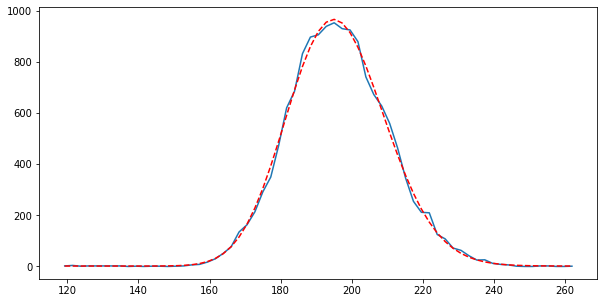

In [50]:
%matplotlib inline
x = np.delete(bin_edges2b,0,0)
y = entries2b


plt.figure(figsize=(10,5))
plt.plot(x,y,'o')


param, param_cov = curve_fit(poisson_,x,y, p0=[100,20000,230,0.01,0.5])

print("Covariance of coefficients:") 
print(param_cov) 
print(f'lambda: {param[0]}')
print(f'a: {param[1]}')
print(f'offy: {param[2]}')
print(f'offx: {param[3]}')
print(f'b: {param[4]}')


%matplotlib inline
plt.figure(figsize = (10,5))
#plt.plot(x,poisson_(x,90,21000,100))
plt.plot(x,y,label='Original Data')
plt.plot(x,poisson_(x,param[0],param[1],param[2],param[3],param[4]), label =f"Curve Fit",ls='dashed',color='red') 


<ipython-input-112-76c132544176>:7: RuntimeWarning: overflow encountered in power
  return scale*( (np.exp(-lamb*a) * lamb**(k-offset)) /factorial(k-offset) )


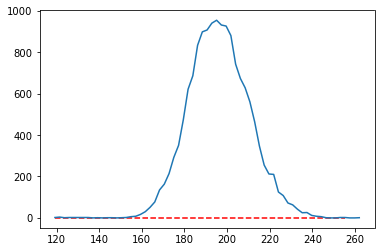

In [115]:
# def poisson_(k, lamb,scale,offset)
#x = np.linspace(120,260,8000)
plt.plot(x,poisson_(x,95,21000,100,2), label =f"Curve Fit",ls='dashed',color='red') 
plt.plot(x,y)
#plt.xlim(0,460)

In [48]:
x

array([0.00000000e+00, 5.75071884e-02, 1.15014377e-01, ...,
       4.59884986e+02, 4.59942493e+02, 4.60000000e+02])

### Veo la data RabiOsc

In [22]:
data4 = np.transpose(np.loadtxt('data/simple/RabiOsc_SBC_carrier_tobs=2ms.dat', delimiter=' '))

No handles with labels found to put in legend.


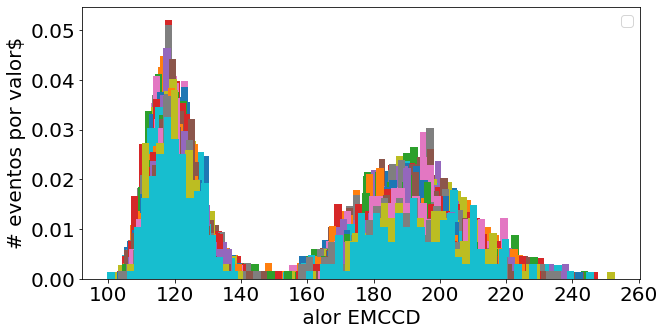

In [73]:
%matplotlib inline
plt.figure(figsize=(10,5))
ent=[]
bed=[]
for i in range(len(data4)):
    entries, bin_edges, patches = plt.hist(data4[i],bins=int(max(data4[i])/4),density=True)
    ent.append(entries)
    bed.append(bin_edges)
#entries1, bin_edges1, patches1 = plt.hist(data4[11],bins=int(max(data4[11])/4),density=True)
plt.ylabel(r'# eventos por valor$',fontsize=20)
plt.xlabel(r' alor EMCCD ',fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
#plt.xlim([0,10])
#plt.ylim([0,0.32])
plt.legend(fontsize=15)
plt.show()

In [31]:
import matplotlib
import imageio
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import signal

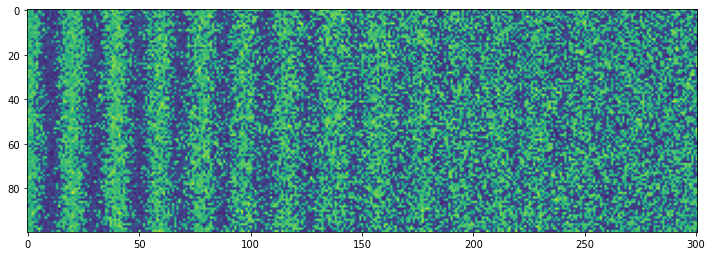

In [34]:
%matplotlib inline
from matplotlib.colors import LogNorm
plt.figure(figsize = (10, 7))
plt.imshow(data4,norm=LogNorm())
plt.tight_layout()

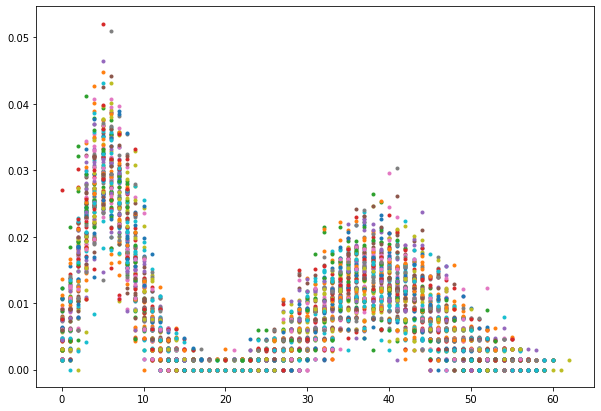

In [98]:
%matplotlib inline
plt.figure(figsize = (10, 7))
entl=[]
bedl=[]
for i in range(len(ent)):
    entl.append(ent[i].tolist())
    bedl.append(bed[i].tolist())
    plt.plot(ent[i],'.')

In [99]:
# Esto lo hice para que todas las sublistas tengan la misma cantidad de elemntos, y asi los puedo plotear 
# como una sola figura
nums1=[]
for i in range(len(entl)):
    f=len(entl[i])
    if f<63:
        for j in range(63-f):
            entl[i].append(0.0)
    nums1.append(len(entl[i]))

nums2=[]
for i in range(len(bedl)):
    f=len(bedl[i])
    if f<64:
        for j in range(64-f):
            bedl[i].append(0.0)
    nums2.append(len(bedl[i]))

### A esto falta ajustarle el eje x pero ya se ve el comportamiento

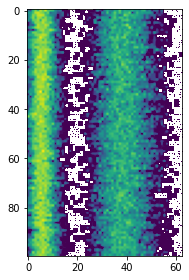

In [100]:
%matplotlib inline
from matplotlib.colors import LogNorm
plt.imshow(entl,norm=LogNorm())
plt.tight_layout()

### Data de una

In [101]:
data4tot=[]
temp=[]
for i in range(len(data4)):
    for j in range(len(data4[i])):
        data4tot.append(data4[i][j])
        temp.append(j)

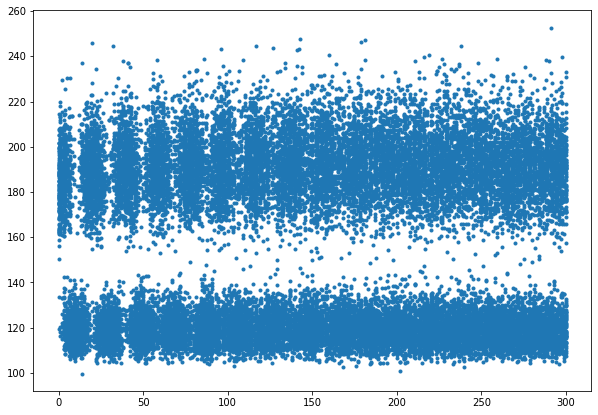

In [102]:
%matplotlib inline
plt.figure(figsize = (10, 7))
plt.plot(temp,data4tot,'.')